In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Preprocessing

### 1. Data loading

In [178]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv'
columns = ['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']
df = pd.read_csv(url, names = columns, sep = ';')
df.head()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


### 2. Examiniation

In [179]:
df.shape

(908, 7)

***Checking NA Values***

In [180]:
df[df.isna().any(axis=1)]

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50


No NA values in the data set

### 3. Examine attributes and target variables

Attributes: ['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']

Target: LC50

***Data Types***: All numeric

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [182]:
X = df.drop(columns = ['LC50'], axis = 0)
y = df['LC50']

In [183]:
X.describe()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000


In [184]:
y.describe()

count    908.000000
mean       4.064431
std        1.455698
min        0.053000
25%        3.151750
50%        3.987500
75%        4.907500
max        9.612000
Name: LC50, dtype: float64

***Variable Distributions***:
- MLOGP ~ N
- CIC0, SM1_Dz ~ N bimodal, SM1_Dz right skewed
- NdsCH	NdssC not normal and right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

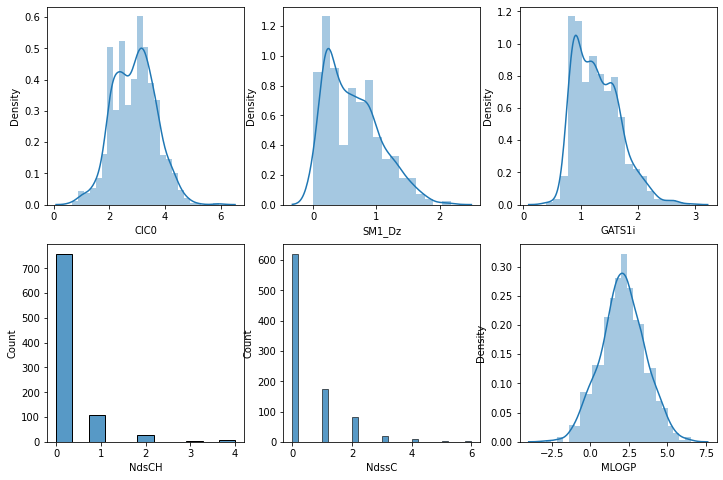

In [185]:
fig, axs = plt.subplots(2, 3, figsize = (12, 8))

for col, ax in zip(X.columns, axs.ravel()):
    if col in ['NdsCH', 'NdssC']:
        sns.histplot(X[col], ax = ax)
    else:
        sns.distplot(X[col], ax = ax)
plt.show()

Target variable is normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


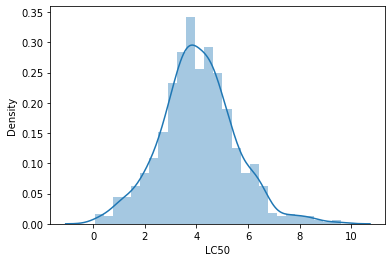

In [186]:
sns.distplot(y)

***Box Plots***:
- Predictors dont have too many outliers
- Target has many outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

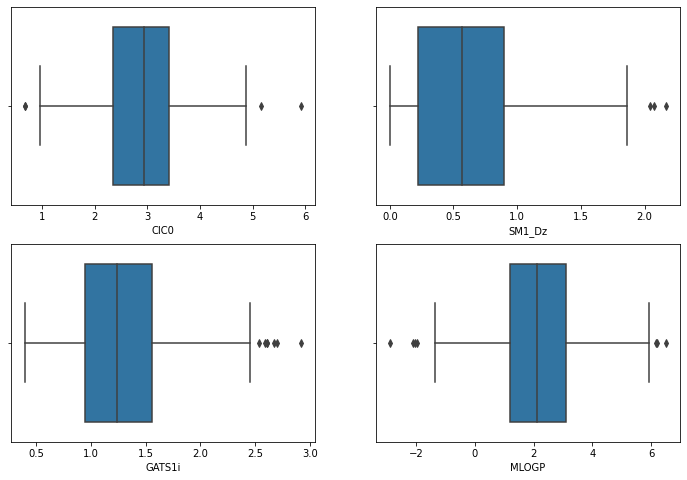

In [187]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

col_lis = [c for c in X.columns if c not in ['NdsCH', 'NdssC']]
for col, ax in zip(col_lis, axs.ravel()):
    sns.boxplot(X[col], ax = ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


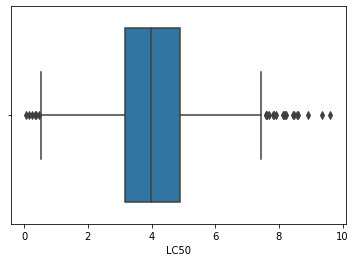

In [188]:
sns.boxplot(y)

***Remove outliers***


In [189]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [190]:
IQR

CIC0      1.06000
SM1_Dz    0.66975
GATS1i    0.61150
NdsCH     0.00000
NdssC     1.00000
MLOGP     1.89600
LC50      1.75575
dtype: float64

In [191]:
outlier_counts = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
outlier_counts = outlier_counts.reset_index()
outlier_counts.rename(columns = {
    'index': 'Attribute',
    0: 'Outlier Count'
}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


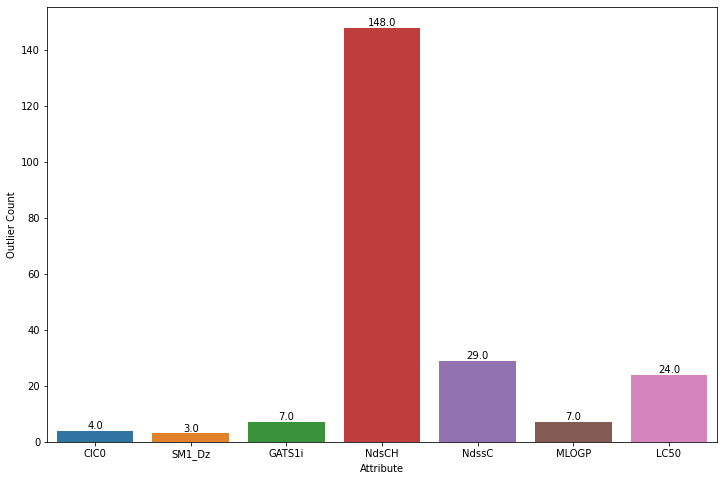

In [192]:
plt.figure(figsize = (12, 8))
chart = sns.barplot(outlier_counts['Attribute'], outlier_counts['Outlier Count'])
for p in chart.patches:
             chart.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


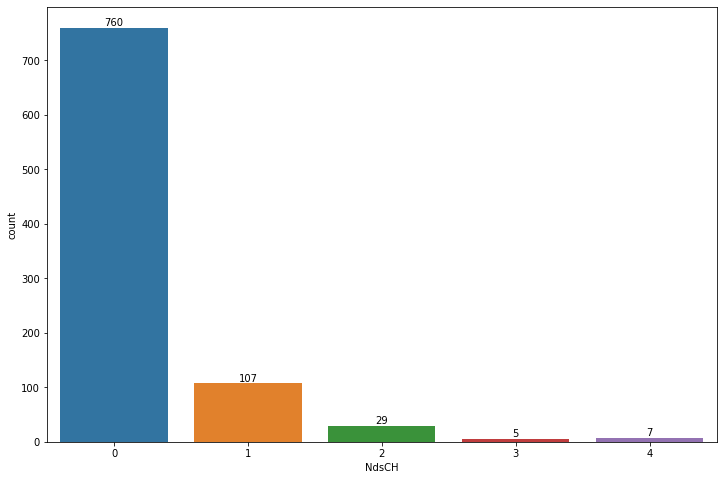

In [193]:
plt.figure(figsize = (12, 8))
chart = sns.countplot(df['NdsCH'])
for p in chart.patches:
             chart.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


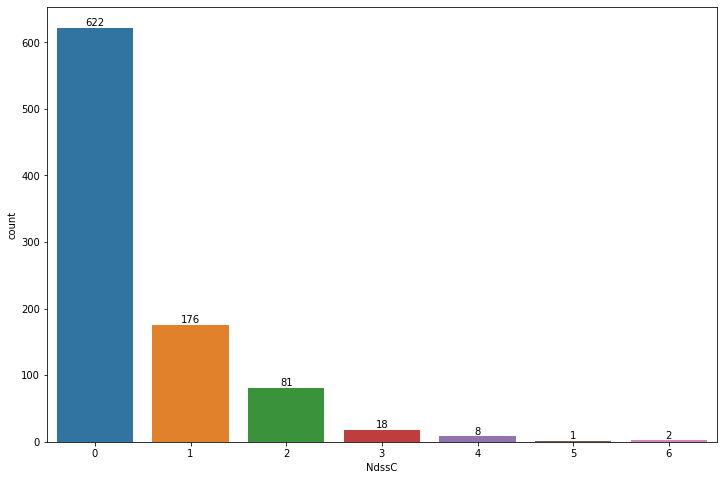

In [194]:
plt.figure(figsize = (12, 8))
chart = sns.countplot(df['NdssC'])
for p in chart.patches:
             chart.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


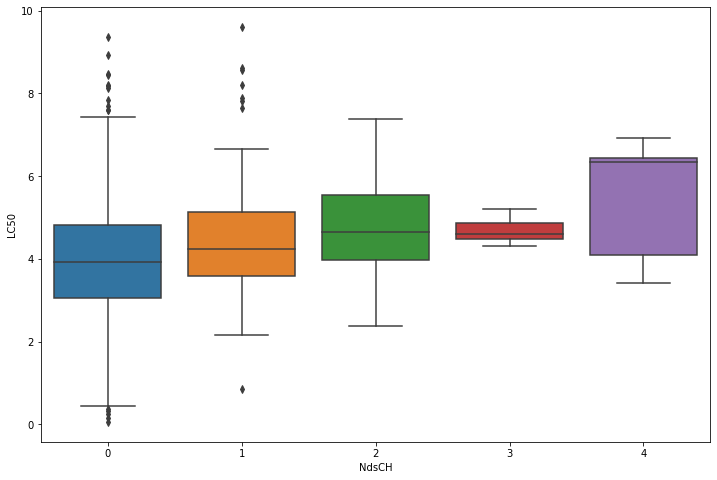

In [195]:
plt.figure(figsize = (12, 8))
sns.boxplot(df['NdsCH'], df['LC50'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


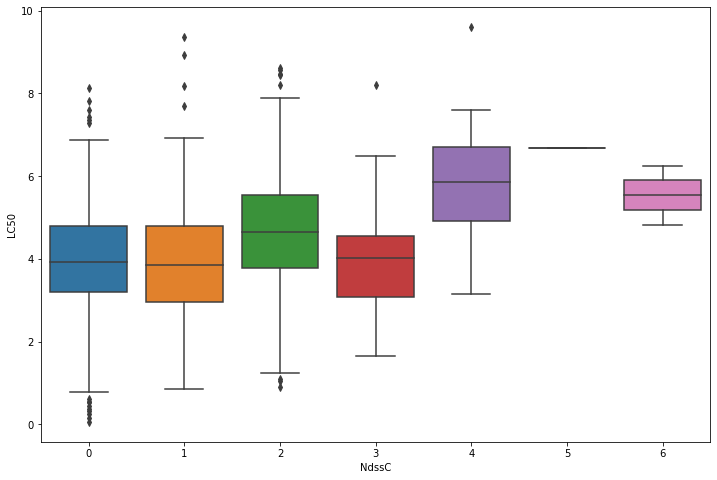

In [196]:
plt.figure(figsize = (12, 8))
sns.boxplot(df['NdssC'], df['LC50'])

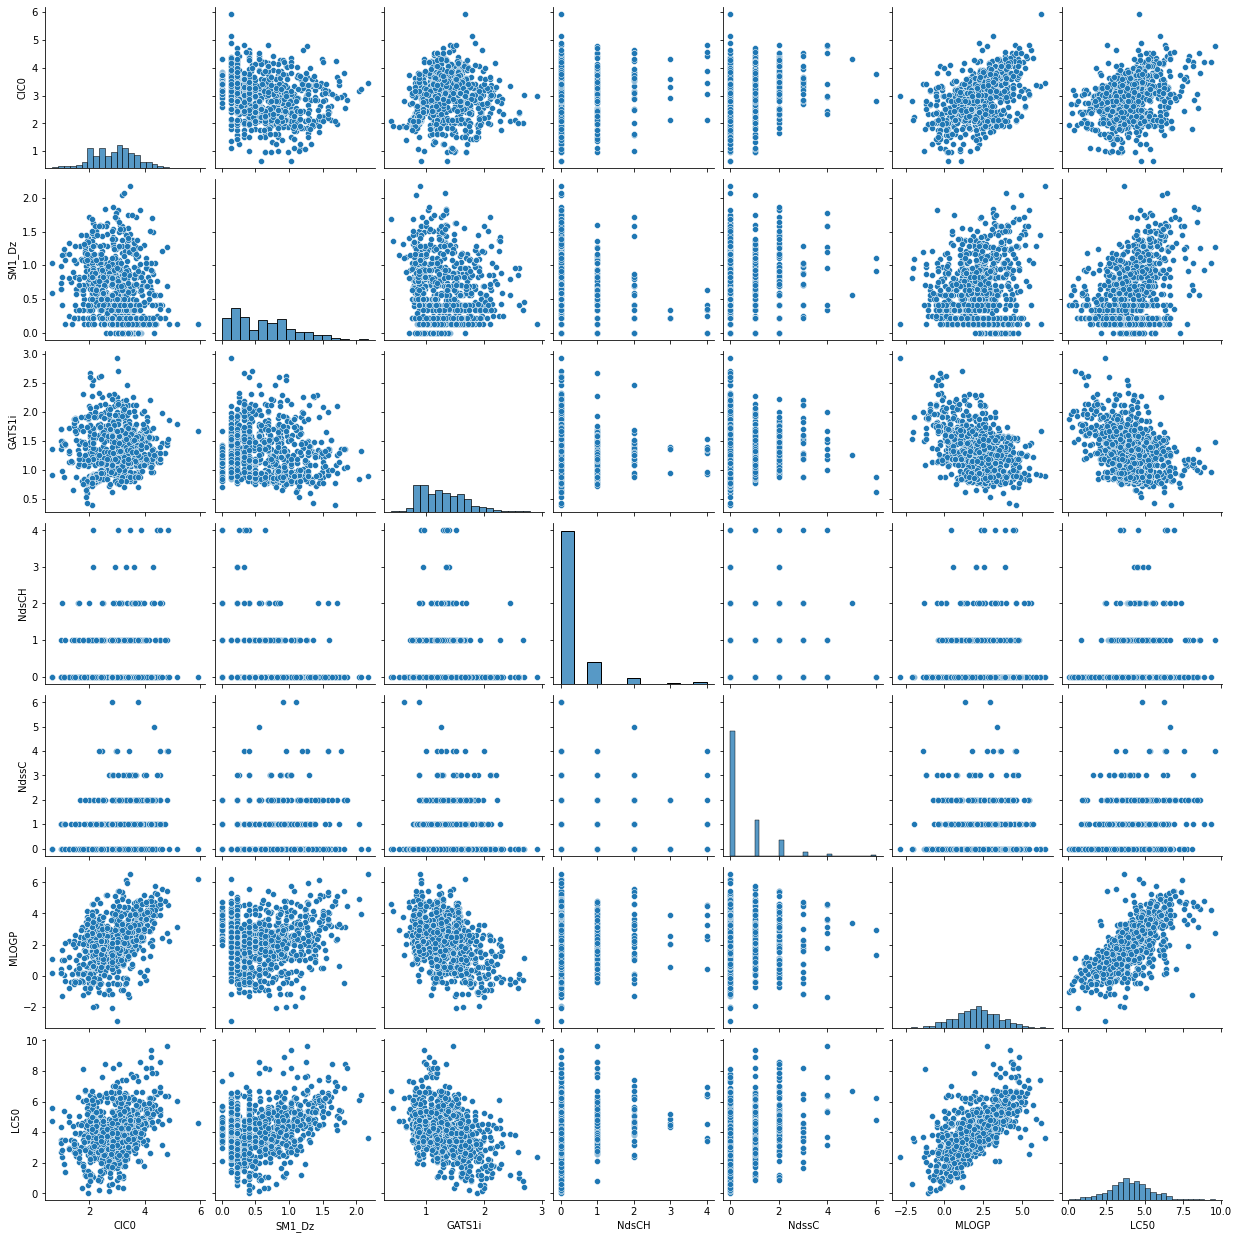

In [144]:
sns.pairplot(df)

### 5. Variable Correlation

***Corrlation matrix***

In [197]:
mat = df.corr()
mat

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz,-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50,0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


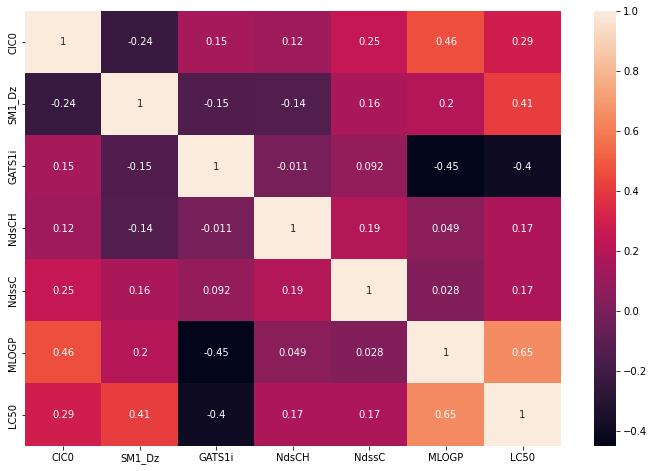

In [198]:
plt.figure(figsize = (12, 8))
sns.heatmap(mat, annot = True)

***Variable Colinearity***

In [199]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index = X.columns)

CIC0      25.598575
SM1_Dz     3.464257
GATS1i    14.480146
NdsCH      1.220603
NdssC      1.544874
MLOGP      7.428264
dtype: float64

In [200]:
X_trimmed = X[['GATS1i', 'CIC0']]
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

GATS1i    8.13224
CIC0      8.13224
dtype: float64

In [201]:
X_trimmed = X.drop(columns = ['GATS1i'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

CIC0      5.178220
SM1_Dz    2.740962
NdsCH     1.219143
NdssC     1.501488
MLOGP     4.386795
dtype: float64

In [202]:
X_trimmed = X.drop(columns = ['CIC0'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

SM1_Dz    3.178833
GATS1i    2.929123
NdsCH     1.218146
NdssC     1.439238
MLOGP     2.628803
dtype: float64

### 6. Important attributes:
- Remove NdsCH and NdssC because they seem like bad predictors
    - low correlation coefficents
    - not distributed well
    - made up mostly of 0
    - too many outliers
    - means realted to the targer are very consistent across column values -> not gaining any information by picking different values. Varying means come from column values with ver low ocunts -> unreliable
- Remove CIC0
    - High colinearity with the other predictors
    - Relatively lower correlation coefficient

- Other attributes have relatively high corelation and are approximately normally distributed
    - relatively low outlier counts

In [203]:
df.drop(columns = ['NdsCH', 'NdssC', 'CIC0'], axis = 0, inplace = True)
df.head()

,SM1_Dz,GATS1i,MLOGP,LC50
0,0.829,1.676,1.453,3.770
1,0.580,0.863,1.348,3.115
2,0.638,0.831,1.348,3.531
3,0.331,1.472,1.807,3.510
4,0.827,0.860,1.886,5.390


### 4. Standardize and normalize the attributes

Only standardizing because for the most part our variables follow normal distributions

In [205]:
s = StandardScaler()
df = pd.DataFrame(s.fit(df).fit_transform(df), columns = df.columns)

In [206]:
df

,SM1_Dz,GATS1i,MLOGP,LC50
0,0.468288,0.970369,-0.458175,-0.202372
1,-0.113184,-1.092634,-0.531479,-0.652576
2,0.022259,-1.173835,-0.531479,-0.366645
3,-0.694657,0.452715,-0.211035,-0.381079
4,0.463618,-1.100247,-0.155883,0.911109
...,...,...,...,...
903,0.232430,2.366006,-0.958736,-0.656700
904,0.568703,-1.082484,1.308103,-0.016792
905,0.671454,-1.054572,0.564591,0.517954
906,1.785359,-0.549605,-0.840053,0.860934


In [208]:
df.describe()

,SM1_Dz,GATS1i,MLOGP,LC50
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,-2.934510e-17,-3.990934e-16,-1.408565e-16,1.467255e-17
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-1.467618e+00,-2.277656e+00,-3.485978e+00,-2.757193e+00
25%,-9.468617e-01,-8.699670e-01,-6.285190e-01,-6.273165e-01
50%,-1.365365e-01,-1.347205e-01,1.236726e-02,-5.287703e-02
75%,6.171595e-01,6.817266e-01,6.951415e-01,5.794703e-01
max,3.602169e+00,4.127044e+00,3.075776e+00,3.813033e+00


In [209]:
X = df.drop(columns = ['LC50'], axis = 0)
y = df['LC50']

### 7. Train/Test Split

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

***Upload the train/test data to gitub to make collaboration easier***

In [213]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)